In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Анализ работы ГА

Предоставлены два способа:
- Построение графика приспособленности(+штрафы) и штрафов лучшей особи и в среднем, что позволяет судить о сходимости алгоритма
- Построение серии столбчатых диаграмм отображающей битовую схожесть каждой особи к лучшей, что позволяет судить о разнообразии популяции

Путь к логу программы:

In [1]:
FILE_PREFIX = 'gatool/build/Desktop-Debug/ga/'  # demo --> result.csv

#### Грифик приспособленности

In [4]:
metrix = pd.read_csv(
    filepath_or_buffer=FILE_PREFIX + 'result.csv', sep=' ', usecols=[0,1,2,3,4],
    index_col=0, names=['epoch', 'best_total', 'mean_total', 'best_penalty', 'mean_penalty'], 
    dtype={'best_total': float, 'mean_total' : float, 'best_penalty' : float, 'mean_penalty': float}
)

In [5]:
metrix

,best_total,mean_total,best_penalty,mean_penalty
epoch,,,,
1,499.0,699.28,349.0,528.88
2,499.0,580.62,349.0,410.42
3,480.0,515.54,300.0,341.54
4,433.0,498.14,263.0,328.34
5,401.0,477.86,261.0,324.66
...,...,...,...,...
9996,190.0,190.00,130.0,130.00
9997,190.0,190.00,130.0,130.00
9998,190.0,190.00,130.0,130.00


In [4]:
%matplotlib qt6

In [ ]:
%matplotlib inline

<Axes: xlabel='Epoch', ylabel='Metrics'>

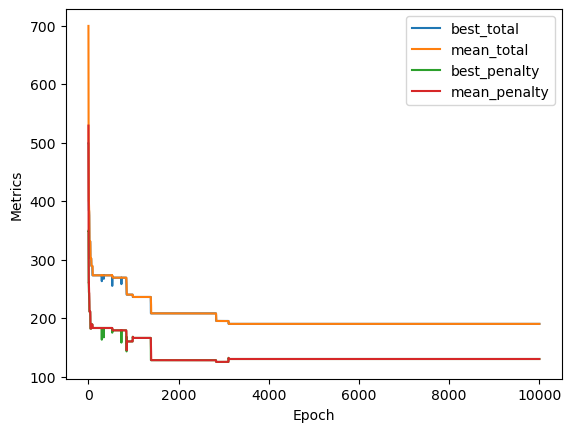

In [6]:
metrix.plot(xlabel='Epoch', ylabel='Metrics', legend=True)

In [7]:
plt.savefig("metrix.png")

<Figure size 640x480 with 0 Axes>

#### Диаграмма схожести

In [8]:
hd = pd.read_csv(
    filepath_or_buffer=FILE_PREFIX + 'result.csv', sep=' ', usecols=[0] + list(range(5, 55)),
    index_col=0, header=None, names=['epoch'] + list(range(1,51))
)

In [10]:
origins = pd.read_csv(
    filepath_or_buffer=FILE_PREFIX + 'result.csv', sep=' ', usecols=[0] + list(range(55, 105)),
    index_col=0, header=None, names=['epoch'] + list(range(1,51))
)

In [11]:
origins

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
epoch,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,9996,9996,9996,9996,9996,9996,9996,9996,9996,...,9996,9996,9996,9996,9996,9996,9996,9996,9996,9996
9997,9997,9997,9997,9997,9997,9997,9997,9997,9997,9997,...,9997,9997,9997,9997,9997,9997,9997,9997,9997,9997
9998,9998,9998,9998,9998,9998,9998,9998,9998,9998,9998,...,9998,9998,9998,9998,9998,9998,9998,9998,9998,9998


In [8]:
%matplotlib inline

In [18]:
def plot_hist(metrix, hd, origins, i):
    fig, ax = plt.subplots()
    
    ax.set_xlim(0.5, 50.5)
    ax.set_ylim(0, 1.2)
    
    ax.set_xlabel('Entity')
    ax.set_ylabel('Bit-similarity')
    
    ax.set_title(f'Population #{i} (mean = {round(hd.loc[i].mean(), 2)})')
    
    bars = plt.bar(hd.columns, hd.loc[i], color='skyblue', width=0.6)
    ax.bar_label(bars, labels=origins.loc[i], label_type='center', rotation=90, fontsize=8, color='steelblue')

    lab = ['' for j in range(len(origins.loc[i]))]
    mark = hd.loc[i] == 1.0
    for j in range(len(lab)):
        if mark[j + 1]:
            lab[j] = str(metrix.loc[i]['best_total'])
        
    
    ax.bar_label(bars, labels=lab, label_type='edge', rotation=90, fontsize=8, color='blue')
    
    fig.savefig(f'{FILE_PREFIX}images/{i}_hist.png')
    plt.close()

Выбирается интересующий участок на прошлом графике (где плоский участок скорее всего популяции потеряла разнообразие)

In [12]:
RANGE_START = 1
RANGE_END   = 101

In [19]:
for i in range(RANGE_START, RANGE_END):
    _ = plot_hist(metrix, hd, origins, i)
    print(i, end=' ')

_;

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

См. серию в папке images.

Подписи в столбцах - эпоха происхождения генома.
Подписи над столбцами - приспособленность.

